### Sri Handini
### 20110019
### S1-SD01-A

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from sklearn import neighbors

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values


## Pelabelan
#### Iris-setosa =  0
#### Iris-versicolor = 1
#### Iris-virginica correspond = 2.

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

## Split Dataset

In [8]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Visualisasi

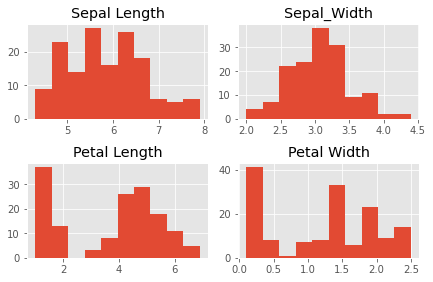

In [21]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(df['SepalLengthCm'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(df['SepalWidthCm'], bins = n_bins);
axs[0,1].set_title('Sepal_Width');
axs[1,0].hist(df['PetalLengthCm'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(df['PetalWidthCm'], bins = n_bins);
axs[1,1].set_title('Petal Width');

'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'

#Add some spacing
fig.tight_layout(pad=1.0);

## KNN

#### K = 1

In [24]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1) 
knn_model_1 = knn.fit(X_train, y_train)
knn_result_1 = knn_model_1.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1)

K-NN accuracy for test set : 1.000000


#### K = 3

In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3) 
knn_model_3 = knn.fit(X_train, y_train)
knn_result_3 = knn_model_3.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_3)

K-NN accuracy for test set : 1.000000


#### K = 7

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7) 
knn_model_7 = knn.fit(X_train, y_train)
knn_result_7 = knn_model_7.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_7)

K-NN accuracy for test set : 0.966667


#### K = 15

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 15) 
knn_model_15 = knn.fit(X_train, y_train)
knn_result_15 = knn_model_15.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_15)

K-NN accuracy for test set : 1.000000


#### K = 25

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 25) 
knn_model_25 = knn.fit(X_train, y_train)
knn_result_25 = knn_model_25.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_25)

K-NN accuracy for test set : 1.000000


## Confussion Matrix

In [14]:
from sklearn.metrics import classification_report
y_true, y_pred  = y_test, knn_model_3.predict(X_test)
print(classification_report(y_true, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



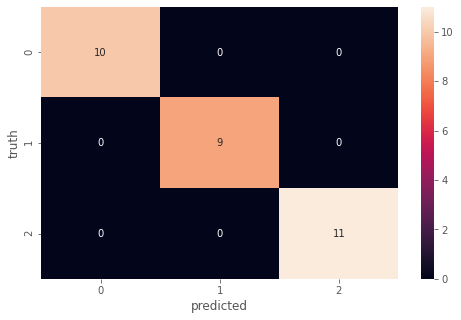

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(figsize=(8,5))
y_true, y_pred = y_test, knn_model_3.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

In [16]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_7.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



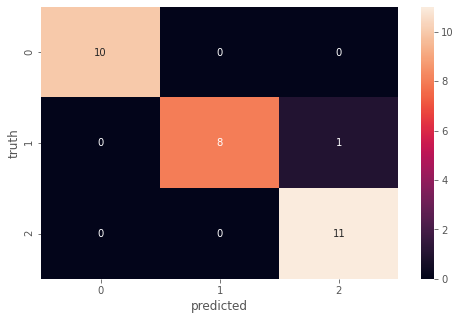

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(figsize=(8,5))
y_true, y_pred = y_test, knn_model_7.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

## Plot

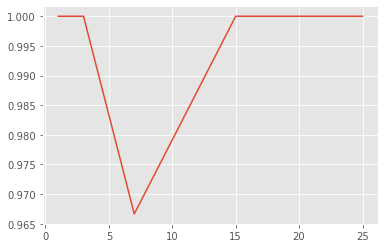

In [25]:
plt.plot([1,3,7,15,25],[knn_result_1,knn_result_3, knn_result_7, knn_result_15, knn_result_25])

## Error Value

memplot nilai K dan rata rata kesalahan pada setiap nilai K untuk membantu menemukan nilai K terbaik

In [19]:
error = []

for i in range(1, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

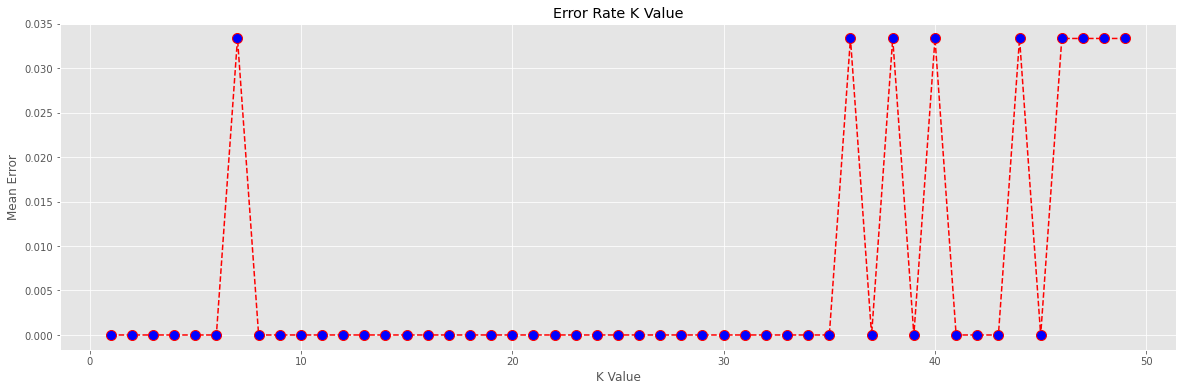

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Kesimpulan

dari 5 nilai K yang dicoba secara random, yaitu 1,3,5,15 dan 25, didapat hasil bahwa nilai K = 7 menghasilkan akurasi 96 % sedangkan yang lainnya 100%.
Lalu, dilakukan plotting rata rata error untuk setiap nilai K di dapatkan bahwa saat nilai K = 7 rata rata error 0,035.
